In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# List to hold the file names
file_names = ['amazon_data_batch_{}.csv'.format(i) for i in range(8)]

# List to hold the DataFrame objects
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_name in file_names:
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all DataFrames in the list along the rows
combined_df = pd.concat(data_frames, ignore_index=True)

# Write the combined DataFrame to a new CSV file
combined_df.to_csv('combined_amazon_data.csv', index=False)

print("CSV files combined successfully!")


CSV files combined successfully!


In [35]:
# Load the data
data = pd.read_csv('combined_amazon_data.csv')

# Display the first few rows of the dataframe
print(data.head())

                                               title      price  \
0  Corsair 4000D Airflow Tempered Glass Mid-Tower...    $130.00   
1  Qcta-Core i9 9880H Mini Desktop PC, Windows 11...    $979.99   
2  GEEKOM Mini IT13 Mini PC 13th Gen Intel Core i...    $849.00   
3  11th Generation i7 1165G7 Quad Core Mini PC, S...  $1,499.99   
4  KAMRUI [Gaming PC] Mini PC AMD Ryzen 7 5700U U...    $629.99   

               rating         reviews           availability   category  \
0  4.7 out of 5 stars  30,351 ratings               In stock  Computers   
1  5.0 out of 5 stars       6 ratings               In stock        NaN   
2  4.8 out of 5 stars               8               In stock  Computers   
3  4.4 out of 5 stars             NaN  Only 2 left in stock.  Computers   
4  4.3 out of 5 stars     175 ratings               In stock  Computers   

  sales_rank      brand  
0        276   ‎CORSAIR  
1        NaN  ‎ASPIRING  
2      9,938    ‎GEEKOM  
3    214,874  ‎ASPIRING  
4      1,199    

In [36]:
# Display summary statistics
print(data.describe())

                                                    title    price  \
count                                                  55       55   
unique                                                 52       47   
top     GEEKOM Mini IT13 Mini PC 13th Gen Intel Core i...  $349.00   
freq                                                    2        3   

                    rating     reviews availability   category sales_rank  \
count                   55          46           55         52         52   
unique                  13          38            8          1         49   
top     5.0 out of 5 stars  22 ratings     In stock  Computers      9,938   
freq                    10           2           45         52          2   

          brand  
count        55  
unique       19  
top     ‎GEEKOM  
freq         10  


In [37]:
# Check for missing values
print(data.isnull().sum())

title           0
price           0
rating          0
reviews         9
availability    0
category        3
sales_rank      3
brand           0
dtype: int64


In [38]:
# Check data types
print(data.dtypes)

title           object
price           object
rating          object
reviews         object
availability    object
category        object
sales_rank      object
brand           object
dtype: object


In [39]:
#reviews are like 30,351 ratings so we will only keep the no for ease of analysis

# Split the 'reviews' column by whitespace and extract the first part (which should be the numeric part)
data['reviews'] = data['reviews'].str.split().str[0]

# Replace NaN values with 1 because there are no nulls in ratings
data['reviews'].fillna(1, inplace=True)

# Display the modified DataFrame
print(data['reviews'])

0     30,351
1          6
2          8
3          1
4        175
5          3
6          1
7          2
8          5
9          1
10         2
11        49
12         5
13        63
14        56
15       107
16        50
17         1
18         6
19        74
20     5,771
21        10
22         4
23        22
24         1
25         3
26         1
27        22
28         2
29        80
30        87
31       262
32        35
33         1
34        17
35         8
36         6
37       379
38         7
39        64
40        22
41         1
42       171
43       590
44         1
45         1
46       285
47         3
48         1
49       263
50         8
51         1
52         4
53        15
54         8
Name: reviews, dtype: object


In [40]:
#   Standardizing the "availability" column to either "in stock" or "out of stock"
data['availability'].unique()

array(['In stock', 'Only 2 left in stock.', 'Only 4 left in stock.',
       'Only 5 left in stock.', 'Only 1 left in stock.',
       'Only 3 left in stock (more on the way).', 'Only 3 left in stock.',
       'Only 1 left in stock (more on the way).'], dtype=object)

In [41]:
# Convert availability to lowercase and then to either 'In stock' or 'Out of stock'
data['availability'] = data['availability'].str.lower().apply(lambda x: 'In stock' if 'in stock' in x else 'Out of stock')

# Display the modified DataFrame
print(data['availability'].unique())

['In stock']


In [42]:
data['category'].unique()

array(['Computers', nan], dtype=object)

In [43]:
#Since all the categories are "computer" lets fill the null values with computer

data['category'].fillna('Computers', inplace=True)
data['category'].unique()

array(['Computers'], dtype=object)

In [44]:
#fill null values in sales_rank with 0 to indicate missing data.
data['sales_rank'].fillna(0, inplace=True)

In [45]:
# Check for missing values
print(data.isnull().sum())

title           0
price           0
rating          0
reviews         0
availability    0
category        0
sales_rank      0
brand           0
dtype: int64


In [46]:
# Assuming data is your DataFrame containing the 'rating' column

# Apply a lambda function to split each value in the 'rating' column and keep the first part
data['rating'] = data['rating'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)


In [47]:
data['rating'].unique()

array(['4.7', '5.0', '4.8', '4.4', '4.3', '4.6', 'Previous', '4.5', '4.0',
       '4.2', '3.8', '3.7', '4.1'], dtype=object)

In [48]:
# Define a dictionary to map alphabetic ratings to numeric ratings
rating_mapping = {'Previous': 0}

# Replace alphabetic values in the 'rating' column with the corresponding numeric values
data['rating'] = data['rating'].replace(rating_mapping, regex=True)

In [49]:
data['rating']

0     4.7
1     5.0
2     4.8
3     4.4
4     4.3
5     4.6
6     5.0
7     5.0
8     4.4
9       0
10    5.0
11    4.8
12    4.6
13    4.5
14    4.8
15    4.3
16    4.5
17    4.0
18    4.8
19    4.4
20    4.7
21    4.7
22    5.0
23    4.6
24      0
25    5.0
26      0
27    4.6
28    5.0
29    4.2
30    4.6
31    4.2
32    4.5
33    4.6
34    4.6
35    4.8
36    4.4
37    4.4
38    3.8
39    4.6
40    4.2
41    5.0
42    4.4
43    4.4
44      0
45      0
46    4.2
47    5.0
48      0
49    4.3
50    3.7
51      0
52    5.0
53    4.1
54    4.7
Name: rating, dtype: object

In [50]:
# Convert the 'rating' column to float
data['rating'] = data['rating'].astype(float)

In [51]:
# Remove the dollar sign ('$') from the 'price' column
data['price'] = data['price'].str.replace('$', '')

# Remove commas from the 'price' column
data['price'] = data['price'].str.replace(',', '')

# Convert the 'price' column to float
data['price'] = data['price'].astype(float)

In [1]:
data.head()

NameError: name 'data' is not defined

In [53]:

data.isna().sum()

title           0
price           0
rating          0
reviews         0
availability    0
category        0
sales_rank      0
brand           0
dtype: int64

In [54]:
# Remove commas from the 'reviews' column
data['reviews'] = data['reviews'].str.replace(',', '')

# Fill missing values (NaN) in the 'reviews' column with '0'
data['reviews'].fillna('1', inplace=True)

# Convert the 'reviews' column to float
data['reviews'] = data['reviews'].astype(int)

In [55]:
## Remove commas from the 'sales_rank' column
data['sales_rank'] = data['sales_rank'].str.replace(',', '')

# Fill missing values (sales_rank) in the 'reviews' column with '0'
data['sales_rank'].fillna('0', inplace=True)

#Convert the 'sales_rank' column to float
data['sales_rank'] = data['sales_rank'].astype(int)

In [56]:
#Convert the 'title' column to string
data['title'] = data['title'].astype(str)

#Convert the 'category' column to string
data['category'] = data['category'].astype(str)

In [57]:
# Convert 'availability' to boolean
data['availability'] = data['availability'].str.contains('In stock')

# Optionally, you can convert the boolean values to integers (0 or 1) if needed
data['availability'] = data['availability'].astype(int)

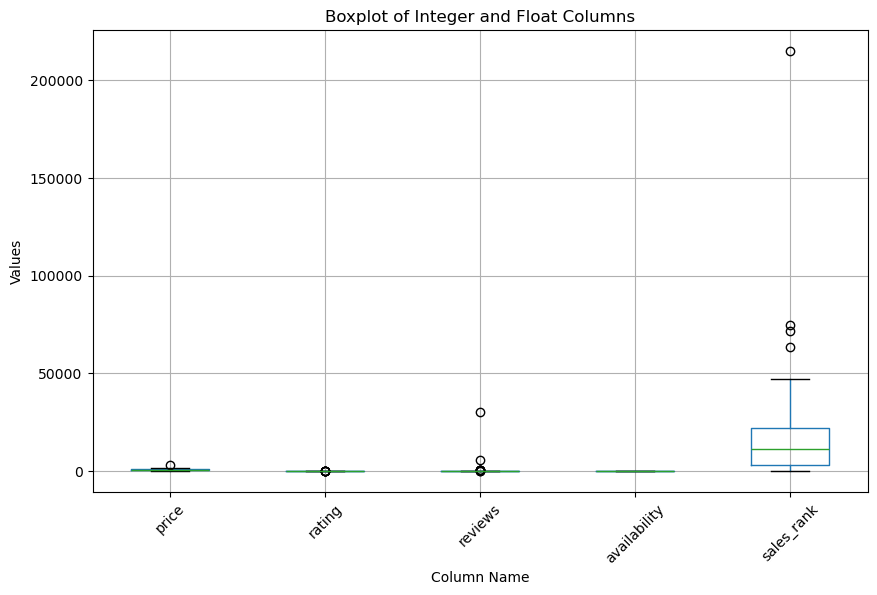

In [62]:
# Select only integer and float columns
numeric_columns = data.select_dtypes(include=['int', 'float'])

# Create a boxplot to check outliers
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title('Boxplot of Columns')
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [63]:
# Calculate the 5th and 95th percentiles for numeric columns

trimmed_data = data.copy()
for col in ['reviews', 'sales_rank']:
    percentile_5 = data[col].quantile(0.05)
    percentile_95 = data[col].quantile(0.95)
    trimmed_col = data[(data[col] >= percentile_5) & (data[col] <= percentile_95)][col]
    trimmed_data[col] = trimmed_col

In [66]:
#check for nulls after outlier removal
trimmed_data.isna().sum()

title           0
price           0
rating          0
reviews         3
availability    0
category        0
sales_rank      6
brand           0
dtype: int64

In [75]:
# Fill missing values (NaN) in the 'reviews' column with '0'
trimmed_data['reviews'].fillna('1', inplace=True)

#drop the columns of missing values in sales_rank
trimmed_data.dropna(subset=['sales_rank'], inplace=True)

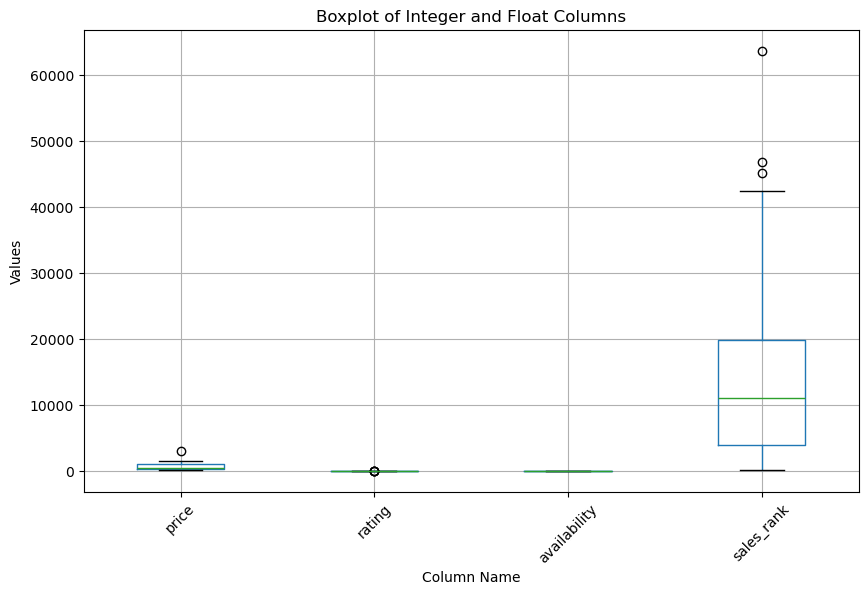

In [78]:
# Select only integer and float columns
numeric_columns = trimmed_data.select_dtypes(include=['int', 'float'])

# Create a boxplot to check outliers
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title('Boxplot of Columns')
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [79]:
# Write the cleaned data to a new CSV file
trimmed_data.to_csv('cleaned_amazon_data.csv', index=False)